In [385]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [386]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,1,73,50,10,0,23.0,0.248,21,0
2,2,84,0,0,0,0.0,0.304,21,0
3,1,80,55,0,0,19.1,0.258,21,0
4,2,142,82,18,64,24.7,0.761,21,0


In [387]:
df.shape

(768, 9)

In [388]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [390]:
df.duplicated().sum()

np.int64(0)

From the above data exploration analysis we find that:
- There are 9 cols and 768 rows.
- There is no NULL values in the dataset.
- Looks like there are outliers in many cols.
- No duplicated record.
- All columns data type either int or float.
- The data need to be standarized/scaled.

In [391]:
fig = px.histogram(df, x='Outcome', color_discrete_map= {1:'orange', 2:'green'}, color='Outcome', width=600, height=400)
fig.update_layout(title='Count of diabetes or No diabetes', xaxis_title='Diabetes')
fig.show()

In [392]:
no_diabetes = round((len(df[df['Outcome']== 0]) / len(df)) * 100,2)
with_diabetes = round((len(df[df['Outcome']== 1]) / len(df)) * 100, 2)
print(f'percentage of no_diabetes = {no_diabetes}')
print(f'percentage of with_diabetes = {with_diabetes}')

percentage of no_diabetes = 65.1
percentage of with_diabetes = 34.9


- The outcome is not balanced. It's biase to no_diabetes.

Feature Engineering
Age Grouping

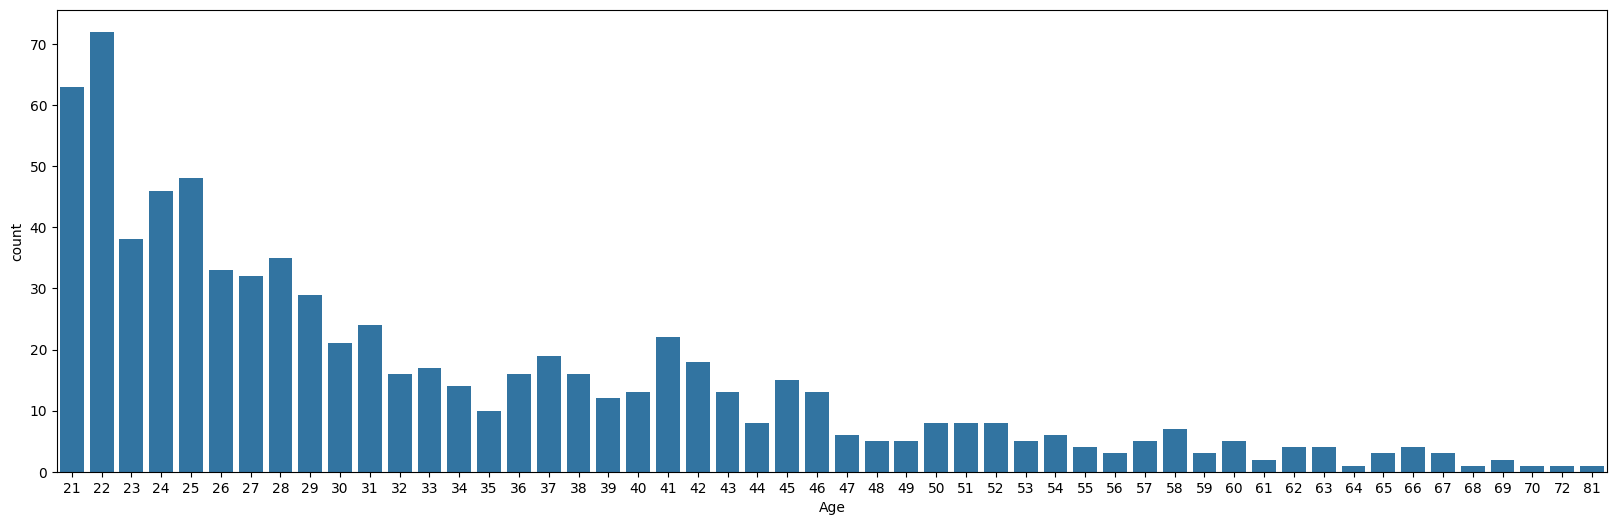

In [393]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', data=df)
plt.show()

In [394]:
bins = [20, 25, 30, 35, 40, 45, 50, 60, 82]
labels = ['20-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-59', '60-81' ]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,1,89,66,23,94,28.1,0.167,21,0,20-24
1,1,73,50,10,0,23.0,0.248,21,0,20-24
2,2,84,0,0,0,0.0,0.304,21,0,20-24
3,1,80,55,0,0,19.1,0.258,21,0,20-24
4,2,142,82,18,64,24.7,0.761,21,0,20-24


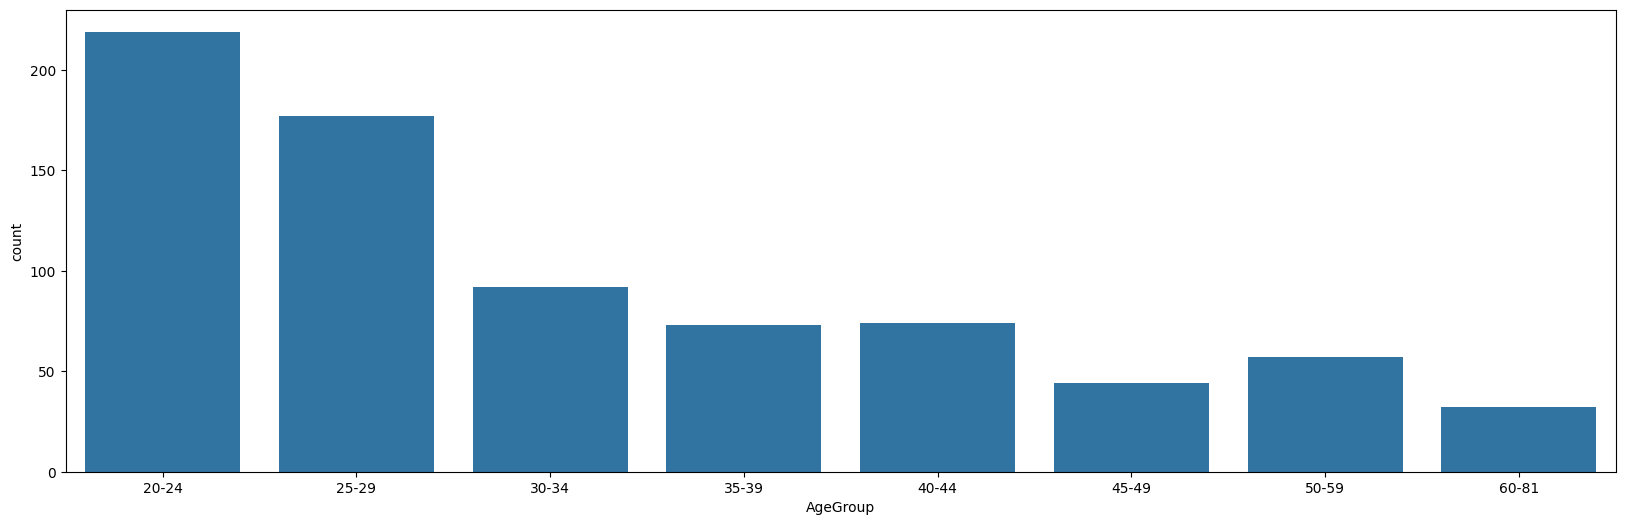

In [395]:
plt.figure(figsize=(20, 6))
sns.countplot(x='AgeGroup', data=df)
plt.show()

## 1. Dealing with Zeros

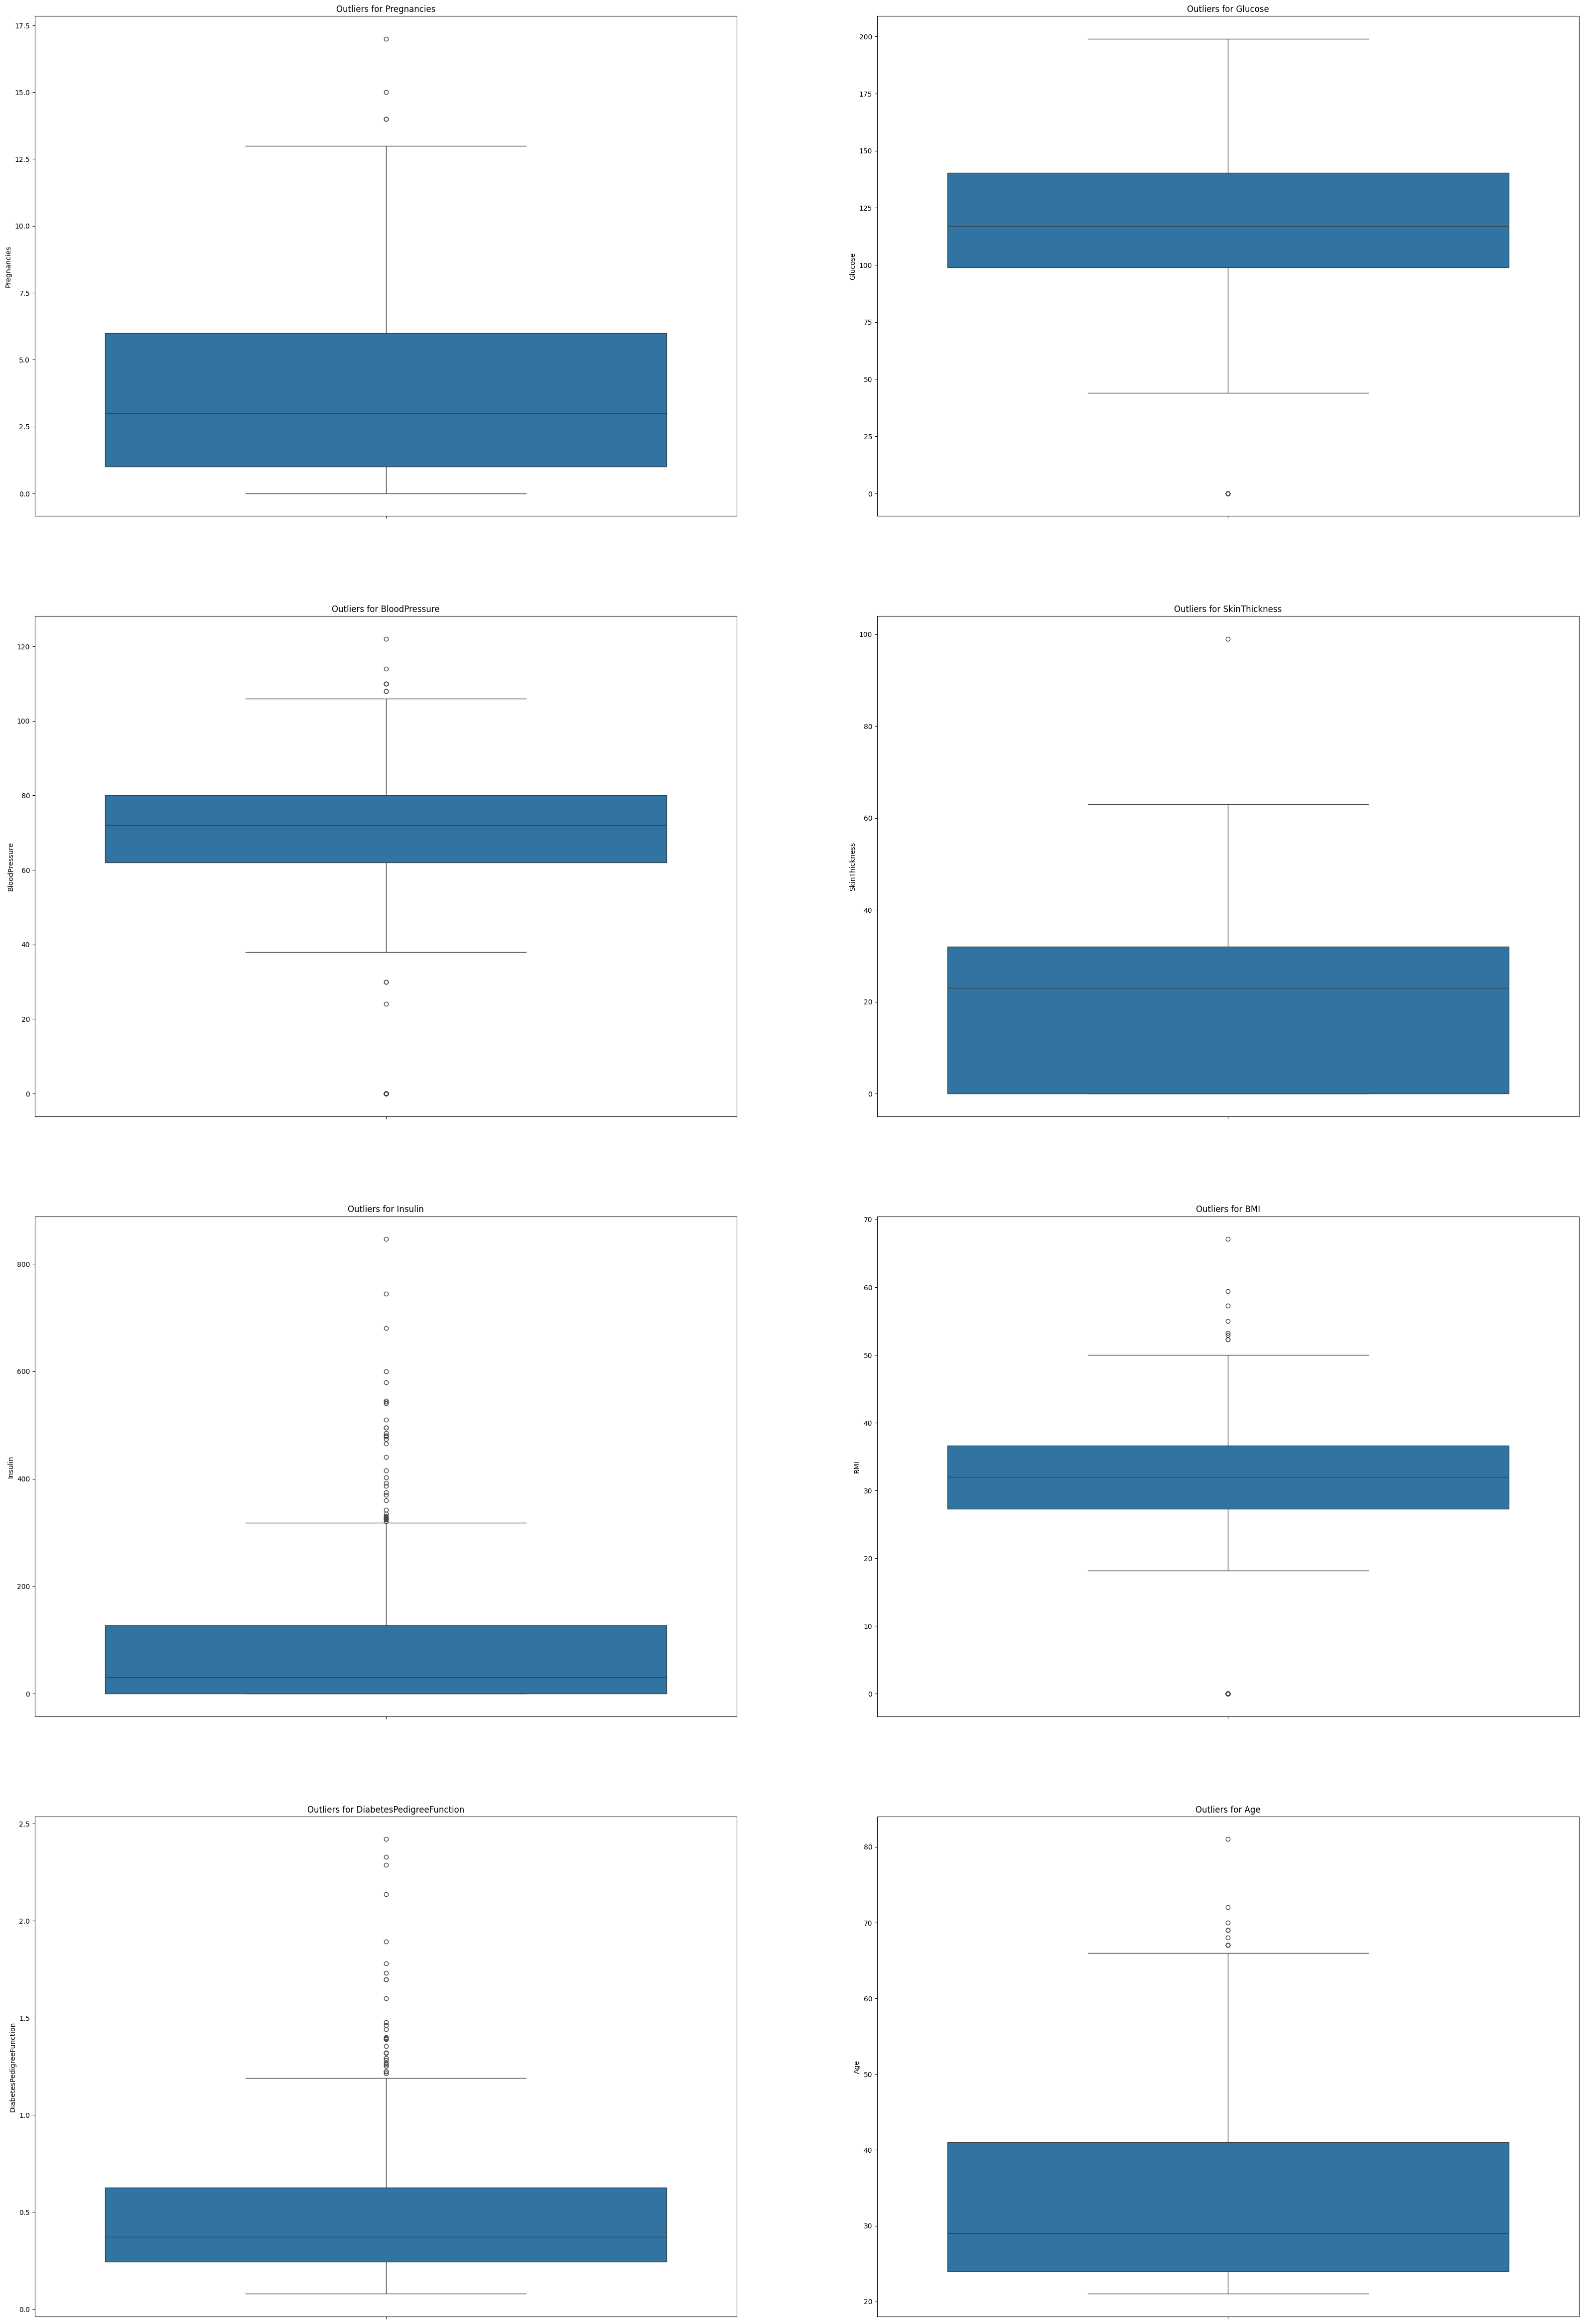

In [396]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(40,60))
axes = axes.flatten()
df_col = df.drop('Outcome', axis=1)

for ax, column in zip(axes, df_col.columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Outliers for {column}')

plt.show()

In [421]:
zero_counts = df[['BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose' ]].apply(lambda x: (x == 0).sum())
print(zero_counts)

BMI               11
Insulin          374
SkinThickness    227
BloodPressure     35
Glucose            5
dtype: int64


We can see that Insulin has the highest numbers of zeros followed by SkinThickness

- drop the rows that contain 3 or more zero values.
- repalce the zero values by mean or median for the rows that contains 2 or 1 zero values

### Remove rows where BP, ST, Insulin and BMI are Zeros

In [422]:
# finding the records that have zero results for BP, ST, BMI and Insulin
df[(df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['BMI'] == 0) & (df['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
2,2,84,0,0,0,0.0,0.304,21,0,20-24
71,2,74,0,0,0,0.0,0.102,22,0,20-24
106,3,80,0,0,0,0.0,0.174,22,0,20-24
173,7,105,0,0,0,0.0,0.305,24,0,20-24
248,0,94,0,0,0,0.0,0.256,25,0,25-29
291,6,114,0,0,0,0.0,0.189,26,0,25-29
415,10,115,0,0,0,0.0,0.261,30,1,30-34


In [423]:
# drop all rows where BP, ST, Insulin, and BMI are 0

df_update1 = df[(df['BloodPressure'] > 0) | (df['SkinThickness'] > 0) | (df['BMI'] > 0) | (df['Insulin'] > 0)]
len(df_update1)

761

In [424]:
# finding the records that have zero results for BP, ST, and Insulin
df_update1[(df_update1['Insulin'] == 0) & (df_update1['SkinThickness'] == 0) & (df_update1['BloodPressure'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
125,0,99,0,0,0,25.0,0.253,22,0,20-24
153,3,116,0,0,0,23.5,0.187,23,0,20-24
154,2,99,0,0,0,22.2,0.108,23,0,20-24
158,4,132,0,0,0,32.9,0.302,23,1,20-24
212,0,119,0,0,0,32.4,0.141,24,1,20-24
231,0,138,0,0,0,36.3,0.933,25,1,25-29
257,0,73,0,0,0,21.1,0.342,25,0,25-29
271,0,131,0,0,0,43.2,0.270,26,1,25-29
313,3,141,0,0,0,30.0,0.761,27,1,25-29
337,2,146,0,0,0,27.5,0.240,28,1,25-29


In [425]:
# drop all rows where BP, ST, and Insulin are 0

df_update2 = df_update1[(df_update1['BloodPressure'] > 0) | (df_update1['SkinThickness'] > 0) | (df_update1['Insulin'] > 0)]
len(df_update2)

735

In [439]:
rows_with_three_zeros = df_update2[['BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose']].apply(lambda row: (row == 0).sum() >= 3, axis=1)
rows_with_three_zeros.sum()

np.int64(2)

In [442]:
df_update2[rows_with_three_zeros]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
708,8,125,96,0,0,0.0,0.232,54,1,50-59
764,5,136,82,0,0,0.0,0.640,69,0,60-81


In [444]:
# drop it
df_update3 = df_update2[(df_update2['BMI'] > 0) | (df_update2['SkinThickness'] > 0) | (df_update2['Insulin'] > 0)]
len(df_update3)

733

## Explor the outlier for each feature

### Blood Pressure (BP)

In [304]:
fig = px.box(df_update3, y='BloodPressure',width=600, height=400)
fig.show()

<Axes: xlabel='BloodPressure', ylabel='Density'>

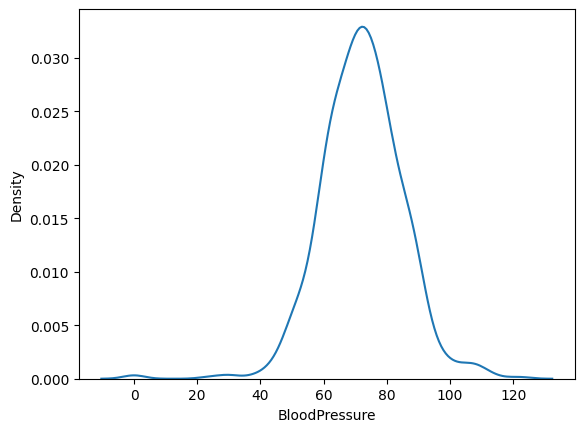

In [305]:
sns.kdeplot(data=df_update3, x='BloodPressure')

In [306]:
print(f'The minimum BP {df_update3['BloodPressure'].min()}')
print(f'The maximum BP {df_update3['BloodPressure'].max()}')
print(f'The average BP {df_update3['BloodPressure'].mean()}')
print(f'The median BP {df_update3['BloodPressure'].median()}')
print(f'The mode BP {df_update3['BloodPressure'].mode()}')

The minimum BP 0
The maximum BP 122
The average BP 72.16234652114598
The median BP 72.0
The mode BP 0    70
Name: BloodPressure, dtype: int64


Blood pressure for a living human being can't be zero, so we should either:
- Remove all the records where BP is 0.
- Update the value with the avg, median or mode. 

In [307]:
# two records remaning, we will try to impute with median value
df_update3[df_update3['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
225,2,87,0,23,0,28.9,0.773,25,0,25-29
632,13,129,0,30,0,39.9,0.569,44,1,40-44


In [308]:
# find the median per Age Group
filtered_df_0 = df_update3[(df_update3['BloodPressure'] > 0) & (df_update3['Outcome'] == 0)]
median_BP_ageGroup_0 = filtered_df_0.groupby('AgeGroup', observed=False)['BloodPressure'].median()
median_BP_ageGroup_0

AgeGroup
20-24    64.0
25-29    70.0
30-34    71.0
35-39    74.0
40-44    74.0
45-49    78.0
50-59    78.0
60-81    78.0
Name: BloodPressure, dtype: float64

In [309]:
df_update3[['BloodPressure','SkinThickness','Glucose']] = df_update3[['BloodPressure','SkinThickness','Glucose']].astype('float64')

C:\Users\WithA\AppData\Local\Temp\ipykernel_7476\683367219.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [310]:
df_update3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               733 non-null    int64   
 1   Glucose                   733 non-null    float64 
 2   BloodPressure             733 non-null    float64 
 3   SkinThickness             733 non-null    float64 
 4   Insulin                   733 non-null    int64   
 5   BMI                       733 non-null    float64 
 6   DiabetesPedigreeFunction  733 non-null    float64 
 7   Age                       733 non-null    int64   
 8   Outcome                   733 non-null    int64   
 9   AgeGroup                  733 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 58.3 KB


In [311]:
filtered_df_1 = df_update3[(df_update3['BloodPressure'] > 0) & (df_update3['Outcome'] == 1)]
median_BP_ageGroup_1 = filtered_df_1.groupby('AgeGroup', observed=False)['BloodPressure'].median()
median_BP_ageGroup_1

AgeGroup
20-24    70.0
25-29    71.0
30-34    74.0
35-39    74.0
40-44    76.0
45-49    78.0
50-59    78.0
60-81    82.0
Name: BloodPressure, dtype: float64

In [312]:
df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 0), 'BloodPressure'] = df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 0), 'AgeGroup'].map(median_BP_ageGroup_0)
df_update3[df_update3['BloodPressure'] == 0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
632,13,129.0,0.0,30.0,0,39.9,0.569,44,1,40-44


In [313]:
df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 1), 'BloodPressure'] = df_update3.loc[(df_update3['BloodPressure'] == 0) & (df_update3['Outcome'] == 1), 'AgeGroup'].map(median_BP_ageGroup_1)
len(df_update3[df_update3['BloodPressure'] == 0])

0

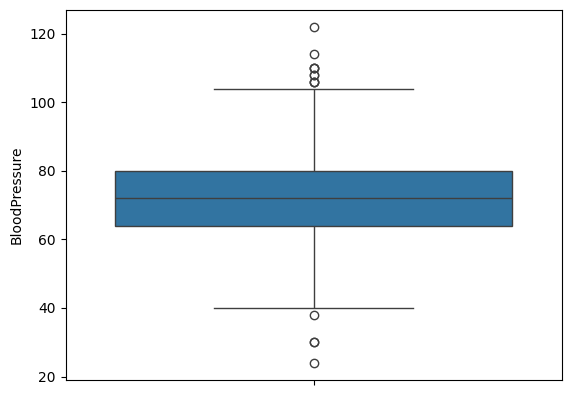

In [314]:
sns.boxplot(data=df_update3, y='BloodPressure')
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Density'>

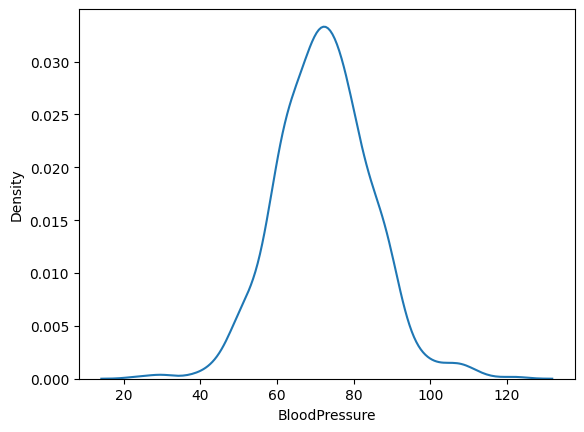

In [315]:
sns.kdeplot(data=df_update3, x='BloodPressure')

## Skin Thinkness (ST)

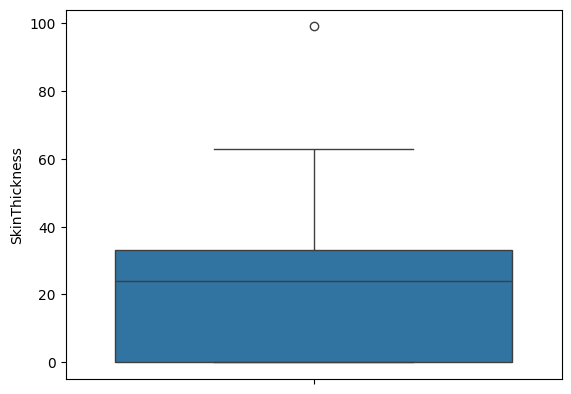

In [316]:
sns.boxplot(data=df_update3, y='SkinThickness')
plt.show()

<Axes: xlabel='SkinThickness', ylabel='Density'>

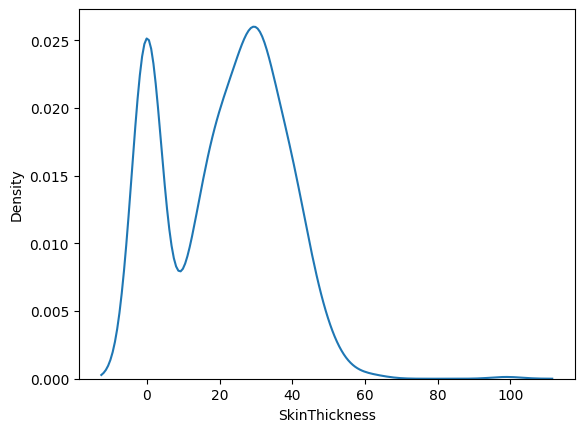

In [317]:
sns.kdeplot(data=df_update3, x='SkinThickness')

In [318]:
print(f'The maximum skin thickness {df_update3['SkinThickness'].max()}')
print(f'The minimum skin thickness {df_update3['SkinThickness'].min()}')
print(f'The average skin thickness {df_update3['SkinThickness'].mean()}')
print(f'The median skin thickness {df_update3['SkinThickness'].median()}')
print(f'The mode skin thickness {df_update3['SkinThickness'].mode()}')

The maximum skin thickness 99.0
The minimum skin thickness 0.0
The average skin thickness 21.51705320600273
The median skin thickness 24.0
The mode skin thickness 0    0.0
Name: SkinThickness, dtype: float64


In [319]:
df_update3[df_update3['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
3,1,80.0,55.0,0.0,0,19.1,0.258,21,0,20-24
5,0,125.0,96.0,0.0,0,22.5,0.262,21,0,20-24
13,3,111.0,62.0,0.0,0,22.6,0.142,21,0,20-24
14,1,105.0,58.0,0.0,0,24.3,0.187,21,0,20-24
20,0,102.0,52.0,0.0,0,25.1,0.078,21,0,20-24
...,...,...,...,...,...,...,...,...,...,...
759,4,146.0,78.0,0.0,0,38.5,0.520,67,1,60-81
760,8,194.0,80.0,0.0,0,26.1,0.551,67,0,60-81
761,0,57.0,60.0,0.0,0,21.7,0.735,67,0,60-81
762,8,91.0,82.0,0.0,0,35.6,0.587,68,0,60-81


In [320]:
# find the median per Age Group
filtered_ST_0 = df_update3[(df_update3['SkinThickness'] > 0) & (df_update3['Outcome'] == 0)]
median_ST_0 = filtered_ST_0.groupby('AgeGroup', observed=False )['SkinThickness'].median()
median_ST_0

AgeGroup
20-24    23.0
25-29    27.5
30-34    30.0
35-39    31.0
40-44    30.0
45-49    30.5
50-59    27.0
60-81    31.0
Name: SkinThickness, dtype: float64

In [321]:
filtered_ST_1 = df_update3[(df_update3['SkinThickness'] > 0) & (df_update3['Outcome'] == 1)]
median_ST_1 = filtered_ST_1.groupby('AgeGroup', observed=False )['SkinThickness'].median()
median_ST_1

AgeGroup
20-24    35.5
25-29    35.5
30-34    32.0
35-39    32.0
40-44    31.0
45-49    31.5
50-59    29.0
60-81    36.0
Name: SkinThickness, dtype: float64

In [322]:
df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 0), 'SkinThickness'] = df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 0), 'AgeGroup'].map(median_ST_0)
df_update3[df_update3['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
49,2,118.0,80.0,0.0,0,42.9,0.693,21,1,20-24
82,4,142.0,86.0,0.0,0,44.0,0.645,22,1,20-24
85,3,139.0,54.0,0.0,0,25.6,0.402,22,1,20-24
130,8,120.0,86.0,0.0,0,28.4,0.259,22,1,20-24
133,4,136.0,70.0,0.0,0,31.2,1.182,22,1,20-24
...,...,...,...,...,...,...,...,...,...,...
741,4,146.0,92.0,0.0,0,31.2,0.539,61,1,60-81
743,0,105.0,84.0,0.0,0,27.9,0.741,62,1,60-81
755,2,158.0,90.0,0.0,0,31.6,0.805,66,1,60-81
758,6,190.0,92.0,0.0,0,35.5,0.278,66,1,60-81


In [323]:
df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 1), 'SkinThickness'] = df_update3.loc[(df_update3['SkinThickness'] == 0) & (df_update3['Outcome'] == 1), 'AgeGroup'].map(median_ST_1)
len(df_update3[df_update3['SkinThickness'] == 0])

0

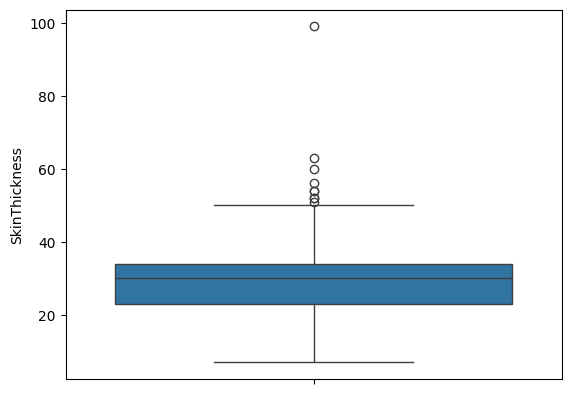

In [324]:
sns.boxplot(data=df_update3, y='SkinThickness')
plt.show()

<Axes: xlabel='SkinThickness', ylabel='Density'>

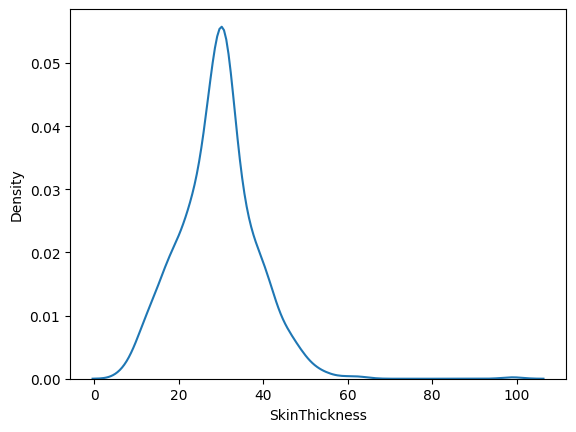

In [325]:
sns.kdeplot(data=df_update3, x='SkinThickness')

### BMI

<Axes: xlabel='BMI', ylabel='Density'>

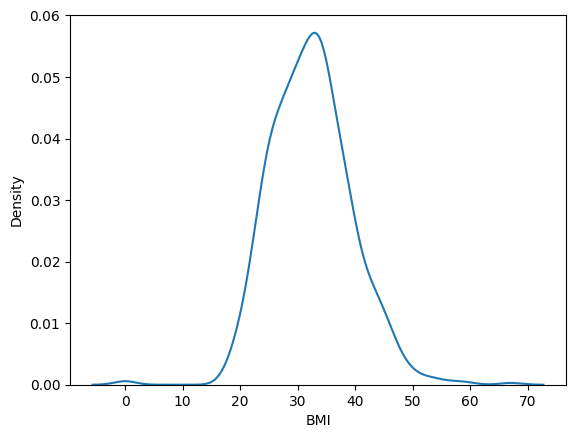

In [326]:
sns.kdeplot(data=df_update3, x='BMI')

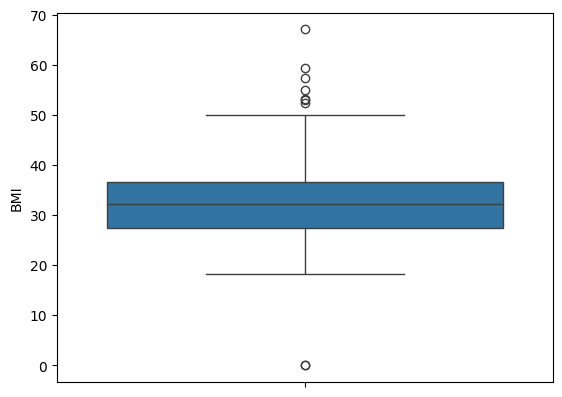

In [327]:
sns.boxplot(data=df_update3, y='BMI')
plt.show()

In [328]:
print(f'The maximum BMI {df_update3['BMI'].max()}')
print(f'The minimum BMI {df_update3['BMI'].min()}')
print(f'The average BMI {df_update3['BMI'].mean()}')
print(f'The median BMI {df_update3['BMI'].median()}')
print(f'The mode BMI {df_update3['BMI'].mode()}')

The maximum BMI 67.1
The minimum BMI 0.0
The average BMI 32.38663028649386
The median BMI 32.3
The mode BMI 0    32.0
Name: BMI, dtype: float64


In [329]:
df_update3[df_update3['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
9,0,102.0,75.0,23.0,0,0.0,0.572,21,0,20-24
28,0,118.0,64.0,23.0,89,0.0,1.731,21,0,20-24


In [330]:
filtered_BMI_0 = df_update3[(df_update3['BMI'] > 0) & (df_update3['Outcome'] == 0)]
median_BMI_0 = filtered_BMI_0.groupby('AgeGroup', observed=False )['BMI'].median()
median_BMI_0

AgeGroup
20-24    28.90
25-29    32.50
30-34    29.85
35-39    30.60
40-44    32.95
45-49    33.60
50-59    27.70
60-81    27.80
Name: BMI, dtype: float64

In [331]:
df_update3.loc[(df_update3['BMI'] == 0) & (df_update3['AgeGroup'] == '20-24'), 'BMI'] = 28.90

## Insulin

<Axes: xlabel='Insulin', ylabel='Density'>

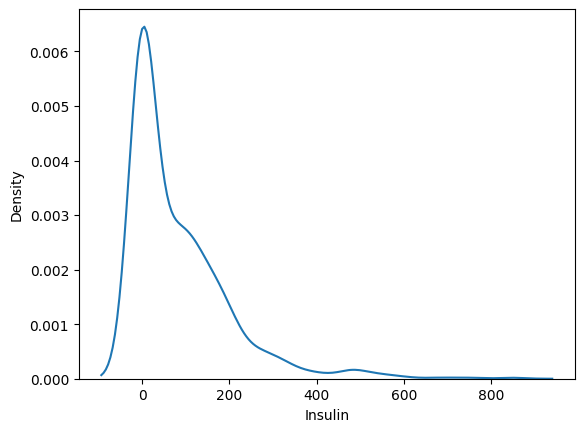

In [332]:
sns.kdeplot(data=df_update3, x='Insulin')

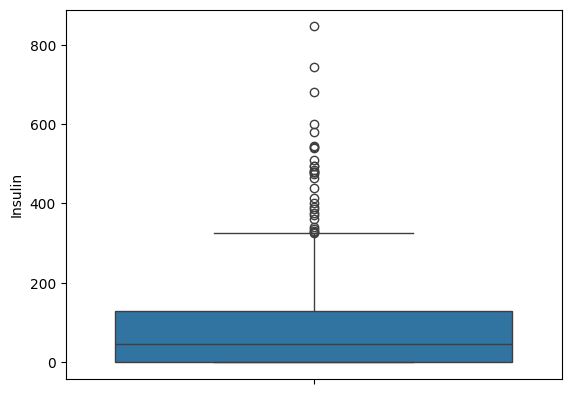

In [333]:
sns.boxplot(data=df_update3, y='Insulin')
plt.show()

In [334]:
print(f'Maximum skin insulin {df['Insulin'].max()}')
print(f'Minimum skin insulin {df['Insulin'].min()}')
print(f'average skin insulin {df['Insulin'].mean()}')
print(f'median skin insulin {df['Insulin'].median()}')
print(f'mode skin insulin {df['Insulin'].mode()}')

Maximum skin insulin 846
Minimum skin insulin 0
average skin insulin 79.79947916666667
median skin insulin 30.5
mode skin insulin 0    0
Name: Insulin, dtype: int64


## Glucose

<Axes: xlabel='Glucose', ylabel='Density'>

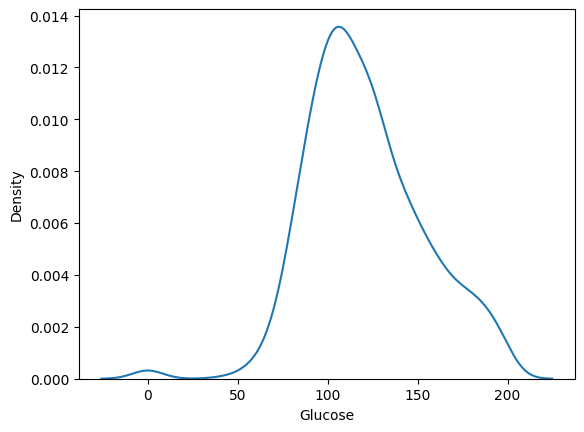

In [335]:
sns.kdeplot(data=df_update3, x='Glucose')

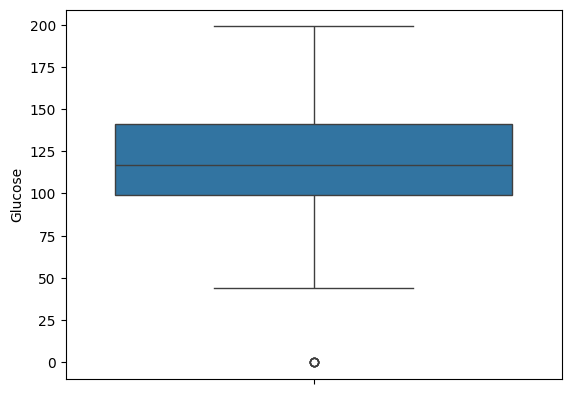

In [336]:
sns.boxplot(data=df_update3, y='Glucose')
plt.show()

In [337]:
print(f'The maximum glucose {df['Glucose'].max()}')
print(f'The minimum glucose {df['Glucose'].min()}')
print(f'The average glucose {df['Glucose'].mean()}')
print(f'The median glucose {df['Glucose'].median()}')
print(f'The mode glucose {df['Glucose'].mode()}')

The maximum glucose 199
The minimum glucose 0
The average glucose 120.89453125
The median glucose 117.0
The mode glucose 0     99
1    100
Name: Glucose, dtype: int64


In [338]:
df_update3[df_update3['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
12,1,0.0,74.0,20.0,23,27.7,0.299,21,0,20-24
69,1,0.0,48.0,20.0,0,24.7,0.140,22,0,20-24
90,1,0.0,68.0,35.0,0,32.0,0.389,22,0,20-24
524,5,0.0,80.0,32.0,0,41.0,0.346,37,1,35-39
590,6,0.0,68.0,41.0,0,39.0,0.727,41,1,40-44


In [339]:
filtered_df_0 = df_update3[(df_update3['Glucose'] > 0) & (df_update3['Outcome'] == 0)]
median_Glucose_0 = filtered_df_0.groupby('AgeGroup', observed=False )['Glucose'].median()
median_Glucose_0

AgeGroup
20-24    106.0
25-29    105.0
30-34    110.0
35-39    113.0
40-44    101.5
45-49    106.0
50-59    125.0
60-81    132.0
Name: Glucose, dtype: float64

In [340]:
filtered_df_1 = df_update3[(df_update3['Glucose'] > 0) & (df_update3['Outcome'] == 1)]
median_Glucose_1 = filtered_df_1.groupby('AgeGroup', observed=False )['Glucose'].median()
median_Glucose_1

AgeGroup
20-24    138.0
25-29    141.5
30-34    128.5
35-39    144.0
40-44    136.0
45-49    133.0
50-59    150.0
60-81    146.0
Name: Glucose, dtype: float64

In [341]:
df_update3.loc[(df_update3['Glucose'] == 0) & (df_update3['Outcome'] == 0), 'Glucose'] = df_update3.loc[(df_update3['Glucose'] == 0) & (df_update3['Outcome'] == 0), 'AgeGroup'].map(median_Glucose_0)
df_update3[df_update3['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
524,5,0.0,80.0,32.0,0,41.0,0.346,37,1,35-39
590,6,0.0,68.0,41.0,0,39.0,0.727,41,1,40-44


In [342]:
df_update3.loc[(df_update3['Glucose'] == 0) & (df_update3['AgeGroup'] == '35-39'), 'Glucose'] = 144
df_update3.loc[(df_update3['Glucose'] == 0) & (df_update3['AgeGroup'] == '40-44'), 'Glucose'] = 136
len(df_update3[df_update3['Glucose'] == 0])

0

In [343]:
df_update4 = df_update3.drop('AgeGroup', axis=1)

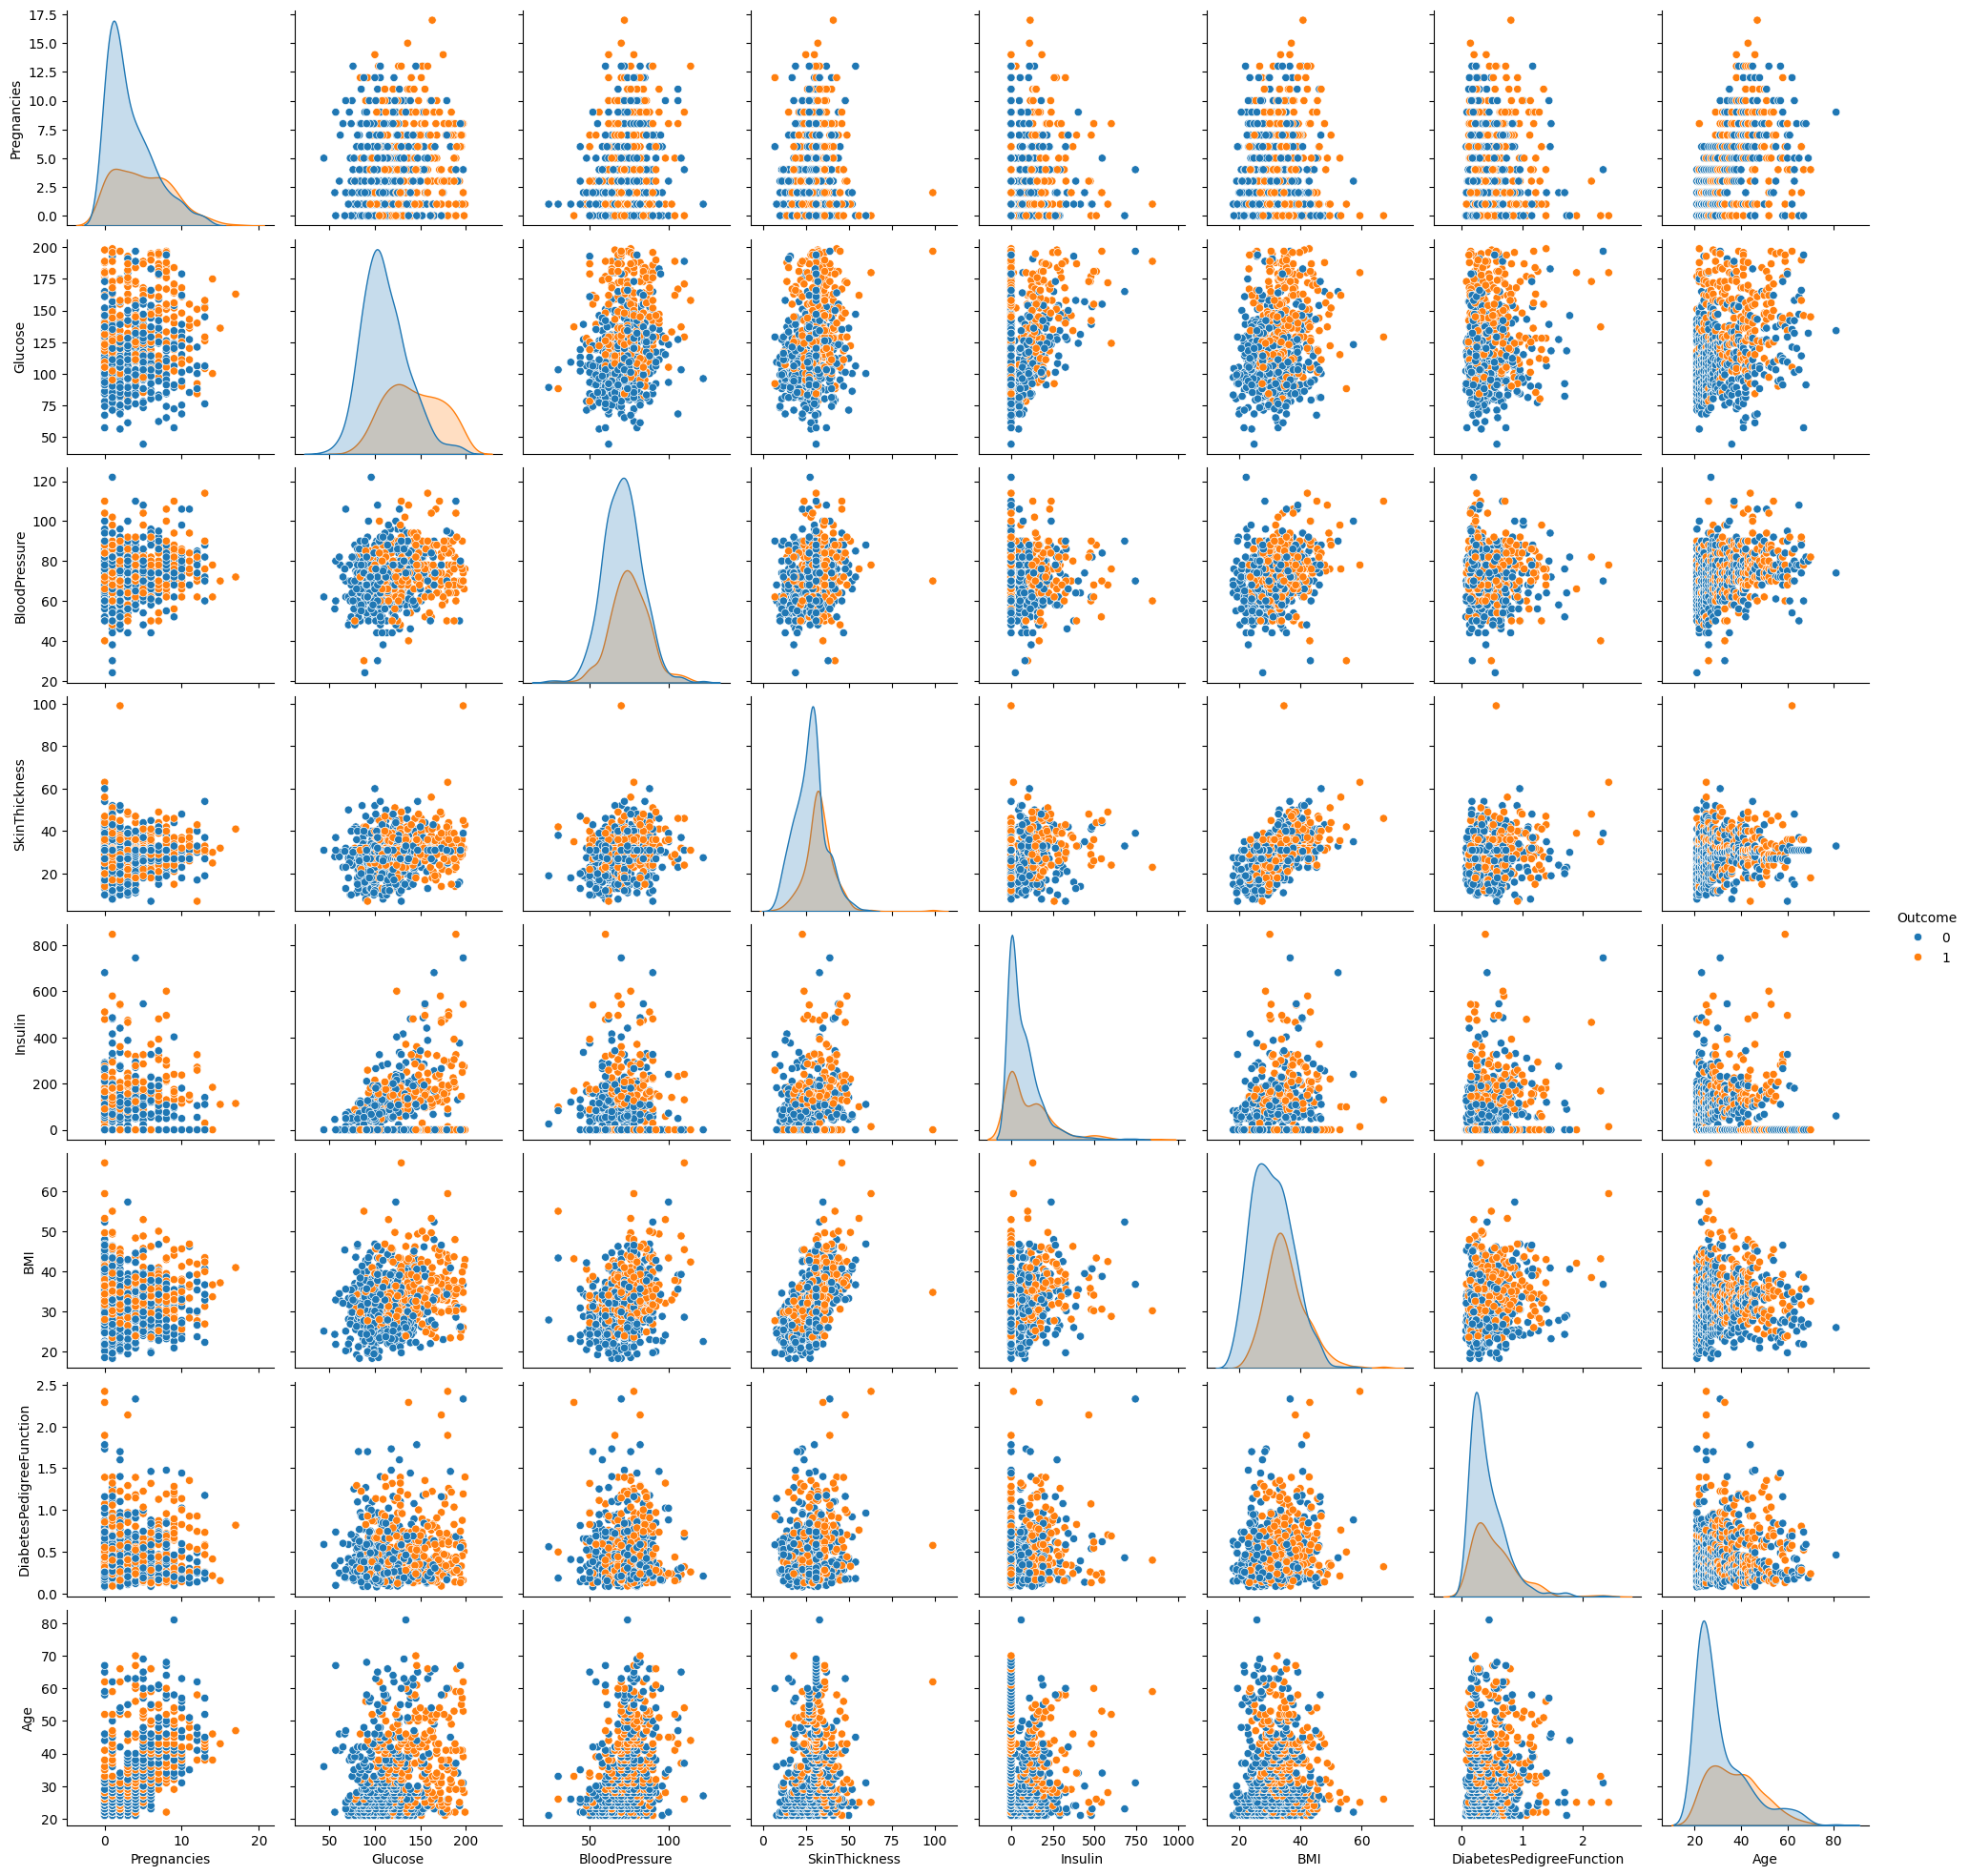

In [344]:
sns.pairplot(df_update4, hue="Outcome")
plt.show()

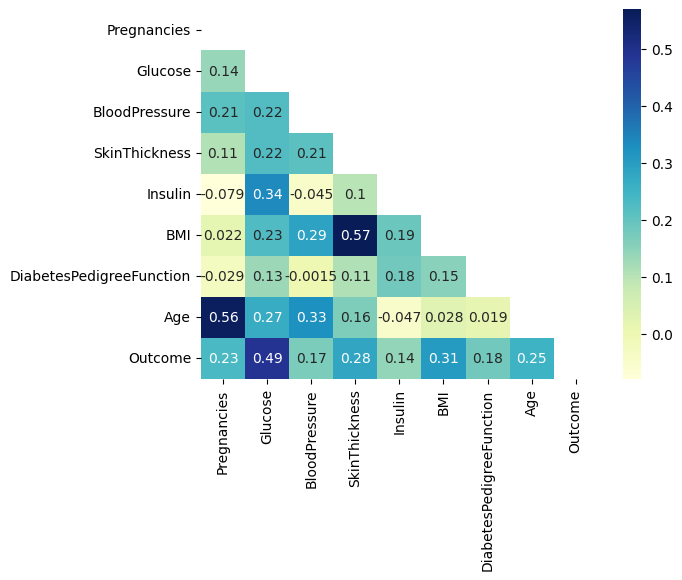

In [345]:
mask = np.triu(np.ones_like(df_update4.corr(), dtype=bool))
#df.corr()
dataplot = sns.heatmap(df_update4.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.show()

## Encoding AgeGroup Column

In [346]:
df_update5 = pd.get_dummies(df_update3, columns=['AgeGroup'])
df_update5.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup_20-24,AgeGroup_25-29,AgeGroup_30-34,AgeGroup_35-39,AgeGroup_40-44,AgeGroup_45-49,AgeGroup_50-59,AgeGroup_60-81
0,1,89.0,66.0,23.0,94,28.1,0.167,21,0,True,False,False,False,False,False,False,False
1,1,73.0,50.0,10.0,0,23.0,0.248,21,0,True,False,False,False,False,False,False,False
3,1,80.0,55.0,23.0,0,19.1,0.258,21,0,True,False,False,False,False,False,False,False
4,2,142.0,82.0,18.0,64,24.7,0.761,21,0,True,False,False,False,False,False,False,False
5,0,125.0,96.0,23.0,0,22.5,0.262,21,0,True,False,False,False,False,False,False,False


In [347]:
fig = px.histogram(df_update5, x='Outcome', color_discrete_map= {1:'orange', 2:'green'}, color='Outcome', width=600, height=400)
fig.update_layout(title='Count of diabetes or No diabetes', xaxis_title='Diabetes')
fig.show()

## Split the data into training and Testing Sets

In [348]:
from sklearn.model_selection import train_test_split

X = df_update5.drop('Outcome', axis =1)
y = df_update5['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## Standarize the Features

In [349]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeGroup_20-24',
       'AgeGroup_25-29', 'AgeGroup_30-34', 'AgeGroup_35-39', 'AgeGroup_40-44',
       'AgeGroup_45-49', 'AgeGroup_50-59', 'AgeGroup_60-81'],
      dtype='object')

In [350]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

## Train the Logisitic Regression Model

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, RocCurveDisplay

In [354]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [355]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.8011695906432749

In [356]:
y_pred = model.predict(X_test)
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.76
Confusion Matrix:
 [[124  20]
 [ 33  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       144
           1       0.68      0.57      0.62        76

    accuracy                           0.76       220
   macro avg       0.74      0.71      0.72       220
weighted avg       0.75      0.76      0.75       220



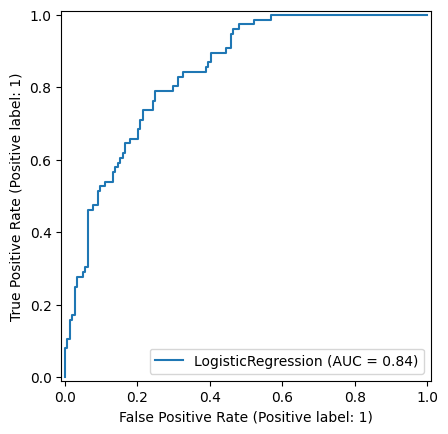

In [357]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

## Balance the dataset

In [358]:
from imblearn.over_sampling import RandomOverSampler

OverSampler = RandomOverSampler(random_state=101 , sampling_strategy='minority')
X_oversampler, y_oversampler = OverSampler.fit_resample(X,y)

In [359]:
len(y_oversampler)

962

In [360]:
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(X_oversampler, y_oversampler, test_size=0.3, random_state=101)

In [361]:
numerical_features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
scaler_os = StandardScaler()
X_os_train[numerical_features] = scaler_os.fit_transform(X_os_train[numerical_features])
X_os_test[numerical_features] = scaler_os.transform(X_os_test[numerical_features])

In [362]:
model_os = LogisticRegression()
model_os.fit(X_os_train, y_os_train)

LogisticRegression()

In [363]:
y_train_pred = model_os.predict(X_os_train)
train_accuracy = accuracy_score(y_os_train, y_train_pred)
train_accuracy

0.7800891530460624

In [364]:
y_os_pred = model_os.predict(X_os_test)
print("Accuracy: {:.2f}".format(accuracy_score(y_os_test, y_os_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_os_test, y_os_pred))
print("Classification Report:\n", classification_report(y_os_test, y_os_pred))

Accuracy: 0.78
Confusion Matrix:
 [[113  29]
 [ 36 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       142
           1       0.79      0.76      0.77       147

    accuracy                           0.78       289
   macro avg       0.78      0.78      0.78       289
weighted avg       0.78      0.78      0.78       289



### Random Forest Tree Model

In [365]:
from sklearn.ensemble import RandomForestClassifier

In [366]:
rft = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=101)
rft.fit(X_os_train, y_os_train)

y_train_rft_pred = rft.predict(X_os_train)
rft_train_accuracy = accuracy_score(y_os_train, y_train_rft_pred)
rft_train_accuracy

0.9316493313521546

In [367]:
y_test_rft_pred = rft.predict(X_os_test)

print('Log loss = {:.5f}'.format(log_loss(y_os_test, y_test_rft_pred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_os_test, y_test_rft_pred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_os_test, y_test_rft_pred)))
print('\nUsing 0.5 as threshold:')
print("Accuracy: {:.2f}".format(accuracy_score(y_os_test, y_test_rft_pred)))
print('Precision = {:.5f}'.format(precision_score(y_os_test, y_test_rft_pred)))
print('Recall = {:.5f}'.format(recall_score(y_os_test, y_test_rft_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_os_test, y_test_rft_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_os_test, y_test_rft_pred))
print("Classification Report:\n", classification_report(y_os_test, y_test_rft_pred))

Log loss = 5.73705
AUC = 0.84042
Average Precision = 0.78634

Using 0.5 as threshold:
Accuracy: 0.84
Precision = 0.83007
Recall = 0.86395
F1 score = 0.84667
Confusion Matrix:
 [[116  26]
 [ 20 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       142
           1       0.83      0.86      0.85       147

    accuracy                           0.84       289
   macro avg       0.84      0.84      0.84       289
weighted avg       0.84      0.84      0.84       289



### KNN

In [368]:
from sklearn.neighbors import KNeighborsClassifier

In [369]:
train_scores = []
test_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_os_train, y_os_train)

    train_scores.append(knn.score(X_os_train, y_os_train))
    test_scores.append(knn.score(X_os_test, y_os_test))

In [377]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
train_scores_ind

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [376]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
test_scores_ind
print("Max test score {} % and k = {}".format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 82.35294117647058 % and k = [1]


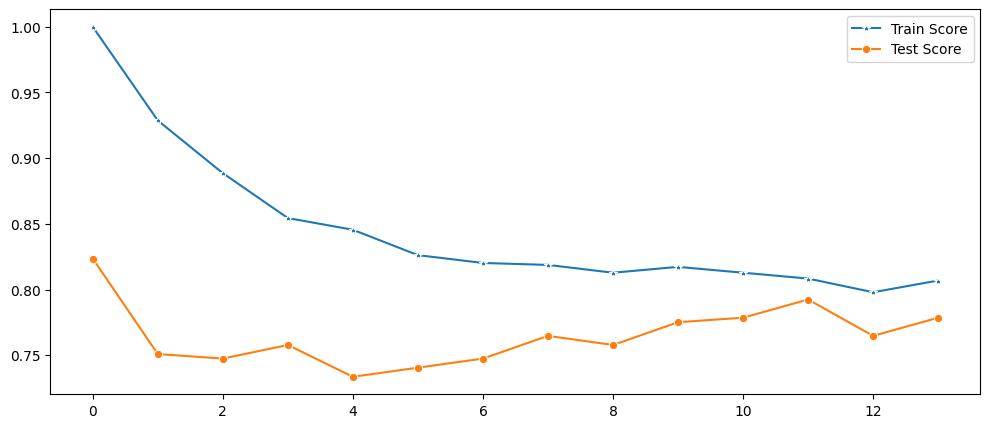

In [378]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(train_scores, marker='*', label='Train Score')
p = sns.lineplot(test_scores, marker='o', label='Test Score')

In [375]:
knn = KNeighborsClassifier(1)

knn.fit(X_os_train,y_os_train)
knn.score(X_os_test,y_os_test)

0.8235294117647058

In [383]:
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X_oversampler.values, y_oversampler.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight= X_os_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

ValueError: X must be an integer or float array. Found object.